<a href="https://colab.research.google.com/github/vparro/controle/blob/master/Controle_Classico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas**

In [ ]:
# Importação de módulos e instalação de bibliotecas adicionais

# Importação do pacote matématico Math
import math

# Importação do pacote Pandas
import pandas as pd

# Importação dos pacotes NumPy e SciPy
import numpy as np
import sympy as sp
from scipy.interpolate import interp1d
from scipy import signal

from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.misc import derivative
from scipy import optimize

# Importação do pacote PyPlot do MatPlotLib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Instalação e importação do pacote mpld3
!pip install mpld3
import mpld3

from mpl_toolkits.mplot3d import Axes3D

# importação do módulo timeit
import timeit

     |████████████████████████████████| 890kB 5.5MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp37-none-any.whl size=200617 sha256=c9de7c0637a0b0f6476a8ca16633020c2c86b73777e3e1741964dea4d23a276e
  Stored in directory: /root/.cache/pip/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
Successfully built mpld3


In [ ]:
# Diretiva do Notebook para exibição de gráficos inline
%matplotlib inline

# Configuração do tamanho dos gráficos
plt.rcParams["figure.figsize"] = (20,10)

#**Sistemas**

## Sistemas lineares - simulação

Para um determinado sistema dinâmico modelado pela função de transferência:

$$\begin{equation}
G(s)=\frac{1}{s+1} =\frac{Y(s)}{X(s)}
\end{equation}$$

onde $Y(s)$ é a saída do sistema e $X(s)$ é a entrada do sistema. Podemos escrever a respectiva equação diferencial a partir da anti transformada de Laplace - $\mathcal{L}^{-1}$.


$$\begin{equation}
sY(s) + Y(s) = X(s)
\end{equation}$$

$$\begin{equation}
\dot{y}(t) + y(t) = x(t)
\end{equation}$$

$$\begin{equation}
\dot{y}(t) = x(t) - y(t)
\end{equation}$$

$$\begin{equation}
\dot{h}(t) = u(t) -  \sqrt{h(t)}
\end{equation}$$

onde $\dot{y}(t) = \frac{dy(t)}{dt}$.

Desejamos determinar a saída do sistema para o caso de um antreda do tipo degrau unitário, aplicado no instante $t = 10s$.

$
    u(t)=
\begin{cases}
    1, &  t\geq 0\\
    0, & \text{caso contrário}
\end{cases}$


In [ ]:
###################################################################################################
# função que retorna dy/dt

def model(y,t):
    # u steps from 0 to 1 at t=10
    # criando um degrau a partir da entrada u

    if t<10.0:
        u = 0
    else:
        u = 1

    # equação dinâmica

    dydt = (-y + u)

    return dydt

# Condição inicial
y0 = 0

# vetor tempo na unidade da equação dinâmica
t = np.linspace(0,20,1000)

# Resolvendo a EDO
y = odeint(model,y0,t)

###################################################################################################
# Visualização

fig = plt.figure()
plt.plot(t,y,'r-',label='Saída(y(t))')
plt.plot([0,10,10,20],[0,0,1,1],'b-',label='Entrada(u(t))')
plt.ylabel('Amplitude')
plt.xlabel('tempo')
plt.legend(loc='best')

# Criação e exibição de tooltips no gráfico
mpld3.plugins.connect(fig, mpld3.plugins.MousePosition(fontsize=14))
mpld3.display()

## Sistema com parâmetro variável

Para um caso mais complexo, onde temos um cojunto de equações diferenciais e, um dos parâmetros está condicionado a evolução das variáveis envolvidas:

$ \begin{align*}
\dot{T}(t) &=  1 - T(t) - k_1T(t) \\
\dot{S}(t) &=  0.1(1-S(t)) - k_1S(t) \\
p(t) &= -0.2T(t)+S(t)
\end{align*} $

sabendo que a lei para $k_1$ é dada por:

$
    k_1(t)=
\begin{cases}
    0, &  p(t)\leq 0.01\\
    5, & \text{caso contrário}
\end{cases}$



In [ ]:
###################################################################################################
# função que retorna dy/dt

def model(t, TS):
    T, S = TS

    p = -0.2*T + S
    k1 = 0 if p <= 0.01 else 5

    dTdt = 1 - T - k1*T
    dSdt = 0.1*(1 - S) - k1*S

    return dTdt, dSdt

###################################################################################################

TS_start = (0.7, 0.4)
t_span = [0, 3]
sol = solve_ivp(model, t_span, TS_start, method='RK45',
                rtol=1e-5)
print(sol.message)
print('nbr eval', sol.nfev)

###################################################################################################
# Visualização

fig = plt.figure()
plt.plot(sol.t, sol.y[0, :], label='T')
plt.plot(sol.t, sol.y[1, :], label='S'); plt.legend();
plt.xlabel('tempo');
plt.ylabel('Amplitude')
plt.grid(color='y', linestyle='-.', linewidth=1)

# Criação e exibição de tooltips no gráfico
mpld3.plugins.connect(fig, mpld3.plugins.MousePosition(fontsize=14))
mpld3.display()


The solver successfully reached the end of the integration interval.
nbr eval 94346


# **Modelagem**

Vamos analisar o sistema dinâmico correspondente a um tanque cuja alimentação ocorre na parte superior, por um sistema de bombeamento e esvaziamento por um orifício na base do tanque. Conforme obtivemos nas primeiras aulas, para uma geometria específica, regido pela equação diferencial apresentada. A equação diferencial  corresponde a um tanque cilíndrico, com formato próximo ao formato de um refrigerante de 2 litros alimentado por uma bomba, semelhante ao de um sistema de carro. Neste equação o variável $h(t)$ representa o nível de fluído no tanque e a variável $e_a(t)$ indica a tensão aplicada em um bomba de comportamento linear e dinâmica desprezível. Analisando a equação constatamos a presença de um termo não linear na Equação que inviabiliza sua transformada de \textit{Laplace} diretamente - $ \sqrt{h(t)} $. Nesta equação temos: $A=78 \;cm^2$, $K_1=1.32\frac{cm^3}{sV}$ e $A_o \sqrt{2g} = 2.7 \frac{cm^{2.5}}{s}$ A Equação diferencial pode ser descrita em linguagem modelada de acordo com o diagrama ilustrado na Figura.

\begin{equation}
    78\frac{dh(t)}{dt}=1.32 e_a(t)-2.7\sqrt{h(t)}
\end{equation}

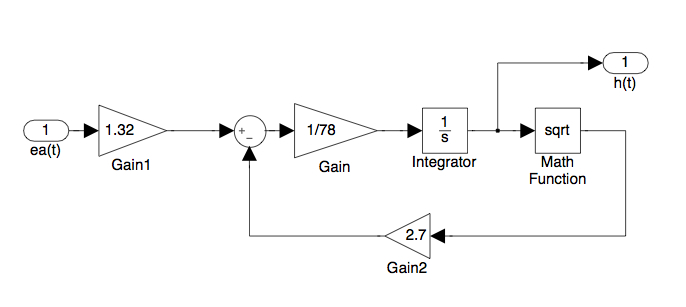

Supondo que desejamos controlar o nível $h(t)$ do tanque em torno de um ponto de interesse $h_0$, o estado estacionário (ponto de equilíbrio) corresponde a situação onde a vazão de entrada é idêntica a vazão de saída. Para obter esta condição, basta considerar o termo da derivada na Equação como zero e obtemos uma relação governada pela Equação. Com o uso apropriado da Equação  podemos obter qual a tensão pode estabilizar o nível em determinado valor e \textit{vice-versa}. Vale observar que existem infinitos pontos de equilíbrio limitados a altura física do tanque ($h_{max}$).

\begin{equation}
    1.32 e_{a0}=2.7\sqrt{h_0}
\end{equation}

Para podermos tratar o sistema em torno do ponto de interesse, devemos linearizar o termo não linear. Podemos utilizar a série de Taylor e truncar o valor no termo de primeira ordem resultando na Equação \ref{eq:03}.

\begin{align}
\begin{split}
 \sqrt{h(t)} \doteq \sqrt{h_0} + (h(t)-h_0) \frac{d\sqrt{h(t)}}{dt}\vert_{h_0},
\\
 \sqrt{h(t)} \doteq \sqrt{h_0} + (h(t)-h_0) \frac{1}{2\sqrt{h_0}}.
\end{split}
\end{align}

Substituindo os resultados temos a equação linear modelada . Observe que quando substituímos o termo linear por sua aproximação obtemos exatamente uma parcela que corresponde a Equação final. Desta forma, se trocarmos o termo $2.7\sqrt{h_0}$ por $1.32 e_{a0}$ podemos estabelecer uma equação de variação, onde: $\Delta h(t) =h(t)-h_0$ e  $\Delta e_a(t) = e_a(t)-e_{a0}$. Observe também que: $\frac{d(h(t)-h_0)}{dt} = \frac{dh(t)}{dt} = \frac{\Delta h(t)}{dt} $ pois $h_0$ é uma constante na perspectiva desta análise.

\begin{align}
\begin{split}
78\frac{dh(t)}{dt}=1.32 e_a(t)-2.7\sqrt{h_0}-2.7((h(t)-h_0) \frac{1}{2\sqrt{h_0}}),
\\
78\frac{dh(t)}{dt}=1.32 e_a(t)-1.32 e_{a0}-2.7((h(t)-h_0) \frac{1}{2\sqrt{h_0}}),
\\
78\frac{d\Delta h(t)}{dt}=1.32 \Delta e_a(t)- \frac{2.7}{2\sqrt{h_0}} \Delta h(t).
\end{split}
\end{align}

Partindo do resultado obtido na manipulação apresentada pode-se facilmente obter a função de transferência do sistema em torno do ponto de equilíbrio escolhido $h_0$ e obtemos a Função de transferência descrita. O subscrito $\Delta$ que aparece nestas equações indica que trata-se de um modelo de desvios e não de um modelo para os valores absolutos. Um ponto importante é compararmos o comportamento entre o modelo linear e o modelo não linear em torno do ponto de operação $h_0$ (equilíbrio).

\begin{align}
\begin{split}
78 s H_{\Delta}(s)=1.32 E_{a\Delta}(s) - \frac{2.7}{2\sqrt{h_0}}H_{\Delta}(s),
\\
(78 s+ \frac{2.7}{2\sqrt{h_0}})H_{\Delta}(s)=1.32 E_{a\Delta}(s),
\\
\frac{H_{\Delta}(s)}{E_{a\Delta}(s)} = \frac{1.32}{(78 s+ \frac{2.7}{2\sqrt{h_0}})}.
\end{split}
\end{align}

Para simularmos ambos os sistema e compararmos o comportamento em torno de $h_0=6.5cm$ por exemplo, construímos o diagrama ilustrado na Figura. Observe que a entrada de ambos os sistemas não é igual. Ao aplicarmos no modelo não linear uma tensão $e_{a1}$ corresponde a um desvio de $e_{a1} - \frac{2.7 \sqrt{6.5}}{1.32}$ aplicado no modelo linear, relação obtida pela Equação. Outro aspecto é que a saída do modelo não linear oferece diretamente $h(t)$ e no caso do modelo linear temos o desvio, logo para obtermos o valor absoluto estimado precisamos adicionar $h_0=6.5$. Por último e não mesmo importante é a inicialização do integrador (Figura com o valor estável em torno do ponto em que estamos estudando $h_0=6.5$.

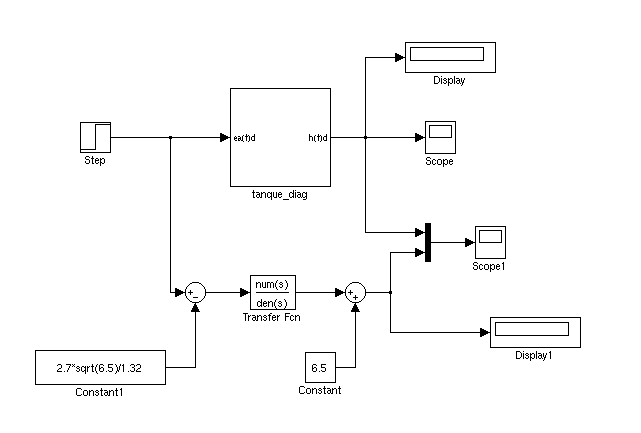

Após a comparação entre os modelos, podemos inferir limitações do mesmo e inseri-las para melhorar sua capacidade de previsão. Por exemplo, se aplicarmos $e_a(t)=1000V$  o sistema aceitará e simulara a respectiva saída $h(t)$ que dependendo do valor pode chegar a quilômetros  o que é bastante improvável. Outro aspecto, natural é que as tensões são somente positivas na bomba, apesar do Matlab simular as tensões negativas, representando sucção de fluido, não é possível de obter fisicamente neste contexto sem mudar o atuador (Bomba). Adicionalmente o Matlab pode chegar a valores negativos de $h(t)$ o que também não faz sentido. A partir destas quatro observações concluímos que precisamos saturar tanto os valores de entrada em uma faixa $[e_{amin},e_{amax}]$ e a saída na faixa $[h_{min},h_{max}]$.

## Simulação malha aberta

In [ ]:
###################################################################################################
# Constantes

A  = 78;
K1 = 1.32;
K2 = 2.7;

In [ ]:
###################################################################################################
# Solução Analítica

sp.init_printing()

# Variáveis simbólicas

x,u = sp.symbols(['x','u'])

# y,u = sp.symbols(['y','u'])

# Equação simbólica

dxdt = (K1*u - K2*sp.sqrt(x))/A

# dydt = (K1*u - K2*sp.sqrt(y))/A

print(sp.diff(dxdt,x))
print(sp.diff(dxdt,u))


-0.0173076923076923/sqrt(x)
0.0169230769230769


In [ ]:
###################################################################################################
# Solução numérica

# Condição de estado estacionário

u = K2/K1
x = 1

# Definindo as funções

def pd_x(x):
    dxdt =(K1*u - K2*sp.sqrt(x))/A
    return dxdt
def pd_u(u):
    dxdt =(K1*u - K2*sp.sqrt(x))/A
    return dxdt

###################################################################################################
# Visualização

print('Cálculo numérico')
print(derivative(pd_x,x,dx=1e-4))
print(derivative(pd_u,u,dx=1e-4))

print('Solução analítica')
print(-K2/(2*A*np.sqrt(x))) # exact d(f(x,u))/dx
print(K1/A) # exact d(f(x,u))/du



Cálculo numérico
-0.0173076923293269
0.0169230769231081
Solução analítica
-0.01730769230769231
0.016923076923076923


## Linearização

Para linearização utilizamos a Série de Taylor truncada no termo de primeira ordem

$\begin{equation}
f(x,u) = f(x_{ss},u_{ss}) + \frac{df(x,u)}{dx} \Delta \; x + \frac{df(x,u)}{du} \Delta \; u
\end{equation}$

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 0, 'u')

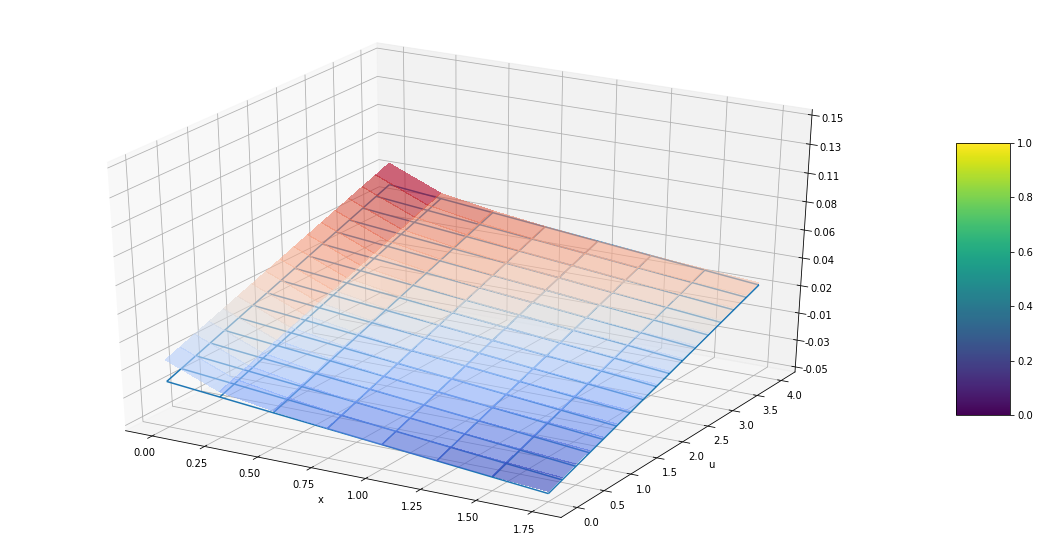

In [ ]:
###################################################################################################

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 2*x, 0.25)
U = np.arange(0, 2*u, 0.25)
X, U = np.meshgrid(X, U)
DXDT = (K1*U - K2*np.sqrt(X))/A
LIN  = (K1*u - K2*np.sqrt(x))/A + (K1/A)* (U-u) - K2/(2*A*np.sqrt(x)) * (X-x)

# Plot the surface.
surf = ax.plot_surface(X, U, DXDT, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.6)
surf = ax.plot_wireframe(X, U, LIN)


# Customize the z axis.
ax.set_zlim(-0.05, 0.15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add labels
plt.xlabel('x')
plt.ylabel('u')


## Comparação

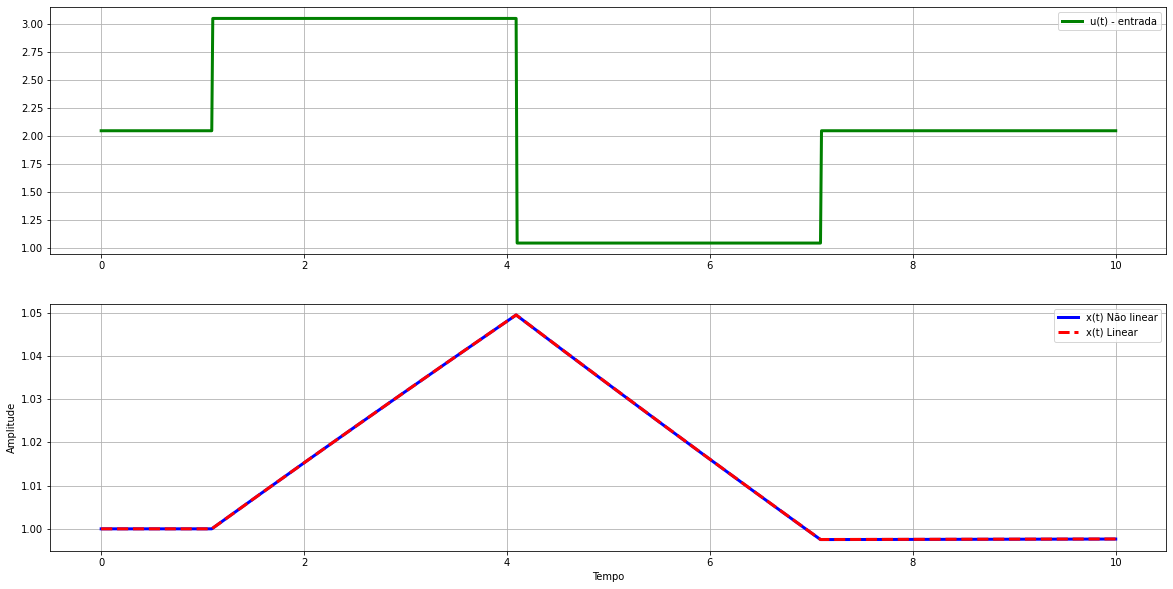

In [ ]:
###################################################################################################
# Um modelo para ambos sistemas: linear e não linear

def model(z,t,u):
    x1 = z[0]
    x2 = z[1]
    dx1dt = (K1*u - K2*np.sqrt(x1))/A
    dx2dt = (K1*K2/K1 - K2*np.sqrt(1))/A + (K1/A)* (u-K2/K1) - K2/(2*A*np.sqrt(x2)) * (x2-1)
    dzdt = [dx1dt,dx2dt]
    return dzdt

# Condição de estado estacionário
x_ss = 1
u_ss = K2/K1

# condição inicial para o modelo
z0 = [x_ss,x_ss]

# tempo final
tf = 10

# número de pontos
n = tf * 100 + 1

# vetor tempo
t = np.linspace(0,tf,n)

###################################################################################################
# entrada

# degrau
u = np.ones(n) * u_ss

# amplitude
m = 1

# t = 1.0 segundo
u[110:] = u[110:] + m

# t = 4.0 segundo
u[410:] = u[410:] - 2.0 * m

# t = 7.0 segundo
u[710:] = u[710:] + m

# Guarda solução
x1 = np.empty_like(t)
x2 = np.empty_like(t)

# Codndições iniciais
x1[0] = z0[0]
x2[0] = z0[1]

###################################################################################################
# Solução numérica

for i in range(1,n):
    # range de análise
    tspan = [t[i-1],t[i]]

    # resolvendo para cada trecho
    z = odeint(model,z0,tspan,args=(u[i],))

    # gurda solução
    x1[i] = z[1][0]
    x2[i] = z[1][1]

    # Atualiza condição inicial
    z0 = z[1]

###################################################################################################
# Visualização

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(t,u,'g-',linewidth=3,label='u(t) - entrada')
plt.grid()
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(t,x1,'b-',linewidth=3,label='x(t) Não linear')
plt.plot(t,x2,'r--',linewidth=3,label='x(t) Linear')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.grid()
plt.legend(loc='best')
plt.show()

# **Controle malha fechada**

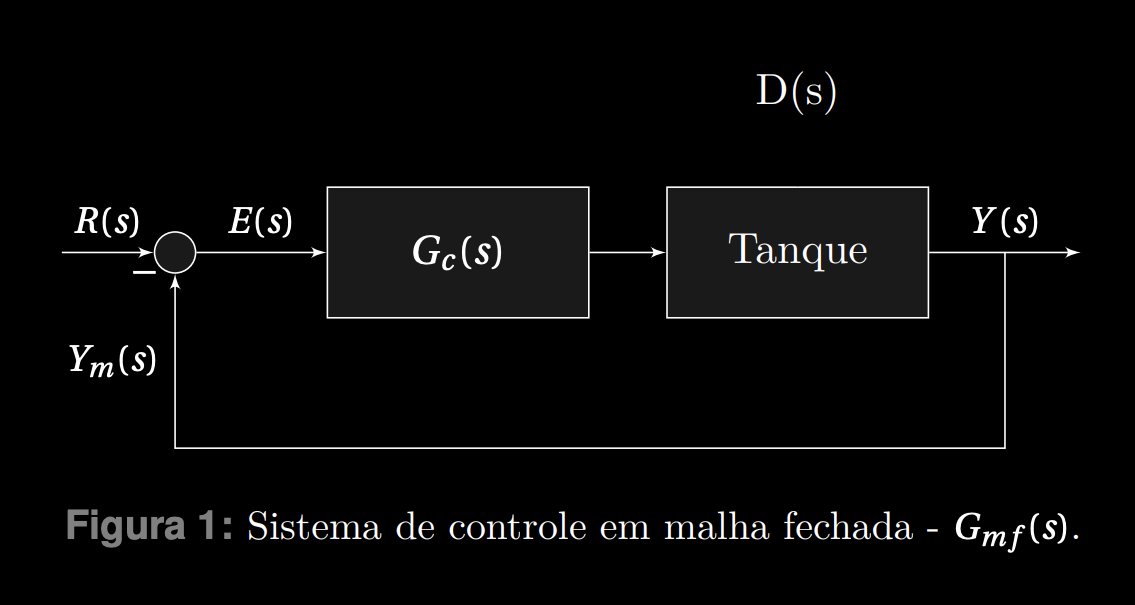

Para um sistema de controle em malha fechada temos

$\begin{equation}
G_{MF}(s) = \frac{Gc(s)Gp(s)}{1+Gc(s)Gp(s)}
\end{equation}$

## Controle em tempo contínuo

\begin{align*}
    x(t) \mathop{\Longleftrightarrow}^{\mathcal{L}} X(s) \\
    X(s) = \color{blue} {\int_{0_{-}}^{\infty}x(t) e^{-st}dt} \\
\end{align*}


\begin{align*}
    x(t) \mathop{\Longleftrightarrow}^{\mathcal{L}} X(s) \\
    \frac{dx(t)}{dt} \mathop{\Longleftrightarrow}^{\mathcal{L}} sX(s) - x(0^+) \\
\end{align*}


Sabemos que a função de transferência em malha aberta é dada por:



\begin{align}
\begin{split}
G_p(s) = \frac{H_{\Delta}(s)}{E_{a\Delta}(s)} = \frac{1.32}{(78 s+ \frac{2.7}{2\sqrt{h_0}})}
\end{split}
\end{align}

Por questão de facilidade vamos trabalhar com $h_0=1$.

\begin{align}
\begin{split}
G_p(s) = \frac{H_{\Delta}(s)}{E_{a\Delta}(s)} = \frac{1.32}{(78 s+ 1.35)}
\end{split}
\end{align}

In [ ]:
###################################################################################################
# Biblioteca de controle e sistemas dinâmicos

!git clone https://github.com/python-control/python-control.git

!pip install slycot   # optional
!pip install control

Cloning into 'python-control'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 6470 (delta 75), reused 71 (delta 45), pack-reused 6350
Receiving objects: 100% (6470/6470), 6.83 MiB | 22.77 MiB/s, done.
Resolving deltas: 100% (4787/4787), done.
     |████████████████████████████████| 1.6MB 4.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp36-cp36m-linux_x86_64.whl size=1417832 sha256=7d363a04baddb2bc82ec348159df7d8bfee4d56d75837f94cb9ee93228821b8d
  Stored in directory: /root/.cache/pip/wheels/a2/46/56/f82cbb2fd06556f4f3952a2eb2396e8fd29264fffecbaad3cf
Successfully built slycot
     |████████████████████████████████| 266kB 4.2MB/s 
  Created wheel for control: filename=control-0.8.4-py2.py3-none-any.whl size=276947 sha256=6a9172b979222533220fa3afcc5

In [ ]:
import control
from control.matlab import *
from control import ss, step_response, forced_response, impulse_response

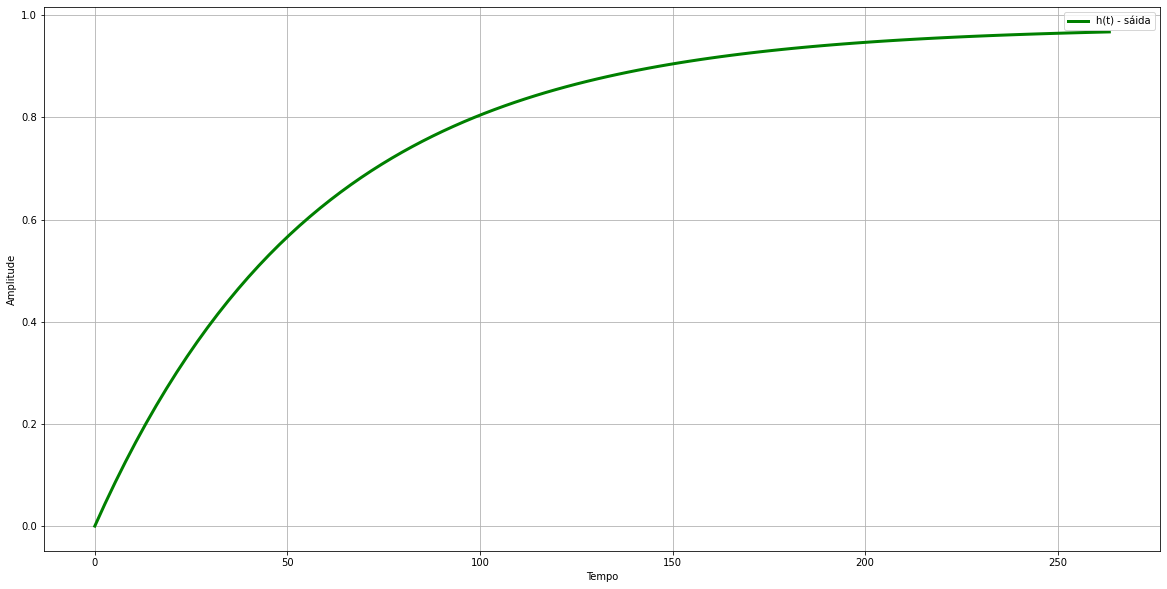

In [ ]:
num = [1.32]
den =[78,1.35]
sys = TransferFunction(num, den)

t, yout = step_response(sys)

###################################################################################################
# Visualização

plt.figure(1)
plt.plot(t,yout,'g-',linewidth=3,label='h(t) - sáida')
plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.show()

## Controle proporcional

Para um sistema de controle em malha fechada temos

$\begin{equation}
G_{MF}(s) = \frac{Gc(s)Gp(s)}{1+Gc(s)Gp(s)}
\end{equation}$

Considerado:

\begin{align}
\begin{split}
G_p(s) = \frac{H_{\Delta}(s)}{E_{a\Delta}(s)} = \frac{1.32}{(78 s+ 1.35)}
\end{split}
\end{align}


temos:

$\begin{equation}
G_{MF}(s) = \frac{Gc(s)\frac{1.32}{(78 s+ 1.35)}}{1+Gc(s)\frac{1.32}{(78 s+ 1.35)}} \\
G_{MF}(s) = \frac{K_p\frac{1.32}{(78 s+ 1.35)}}{1+K_p\frac{1.32}{(78 s+ 1.35)}}
\end{equation}$


\begin{align*}
\underbrace{\frac{Y(s)}{R(s)}}_{\texttt{Ganho}} &= \quad \underbrace{\frac{K_p\frac{1.32}{(78 s+ 1.35)}}{1+K_p\frac{1.32}{(78 s+ 1.35)}}}_{\texttt{Função de transferência}}
\end{align*}

A partir da transformada de Laplace de um termo de primeira ordem:

\begin{align*}
    x(t) \mathop{\Longleftrightarrow}^{\mathcal{L}} X(s) \\
    e^{at} u(t) \mathop{\Longleftrightarrow}^{\mathcal{L}} \frac{1}{s+a} \\
\end{align*}

onde $u(t)$ representa o degrau unitário.

Convém observar o Denominador da função de transferência:

\begin{equation}
D_{MF}(s) = 78s+1.32+1.32K_p
\end{equation}

Observe que o pólo em malha fechada fica dependente do ganho do controlador $K_p$:

\begin{equation}
p_{MF} = - \left( \frac{1.32 K_p + 1.35}{78} \right)
\end{equation}

Dependendo do ganho **sintonizado** obtem-se um polos diferente e, consequentemente, uma resposta temporal diferente em malha fechada.

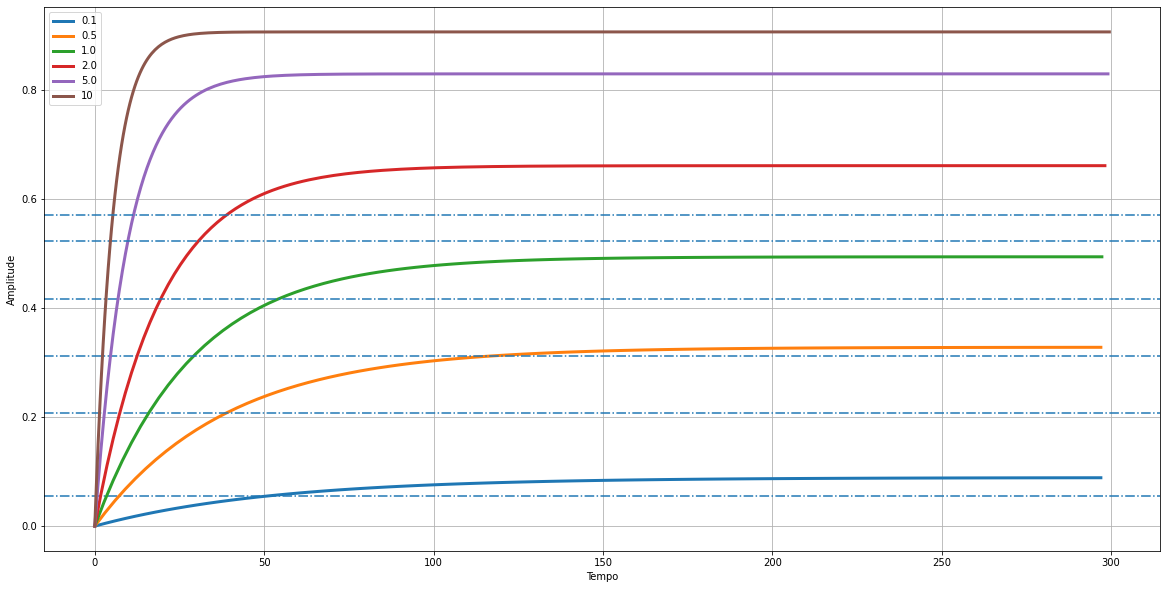

In [ ]:
plt.figure(1)

for Kp in [0.1, 0.5, 1.0, 2.0, 5.0, 10]:
  num = [1.32*Kp]
  den =[78,1.35+Kp*1.32]
  sys = TransferFunction(num, den)

  t, yout = step_response(sys,300)

###################################################################################################
# Visualização

  plt.plot(t,yout,linewidth=3,label=str(Kp))
  plt.axhline(y=0.63*yout[-1], linestyle='-.')

plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.show()


## Projeto do controlador

Forma canônica - modelo de referência - ajuste de coeficientes

\begin{align*}
    G(s) = \frac{w_n^2}{s^2+2\zeta w_n s + w_n^2} = \frac{a}{s^2+2b s + c}
\end{align*}

$ \zeta$ : amortecimento

$ \omega_n: $ frequência natural

**Resposta ao impulso:**

\begin{align*}
    g(t) = \frac{\omega_n}{\sqrt{1-\zeta^2}}e^{-\zeta \omega_n t}sen(\omega_n\sqrt{1-\zeta^2}t)
\end{align*}

**Resposta ao degrau:**

\begin{align*}
    y(t) = 1 - \frac{e^{-\zeta \omega_n t}}{\sqrt{1-\zeta^2}}sen(\omega_n\sqrt{1-\zeta^2}t + \Theta)
\end{align*}



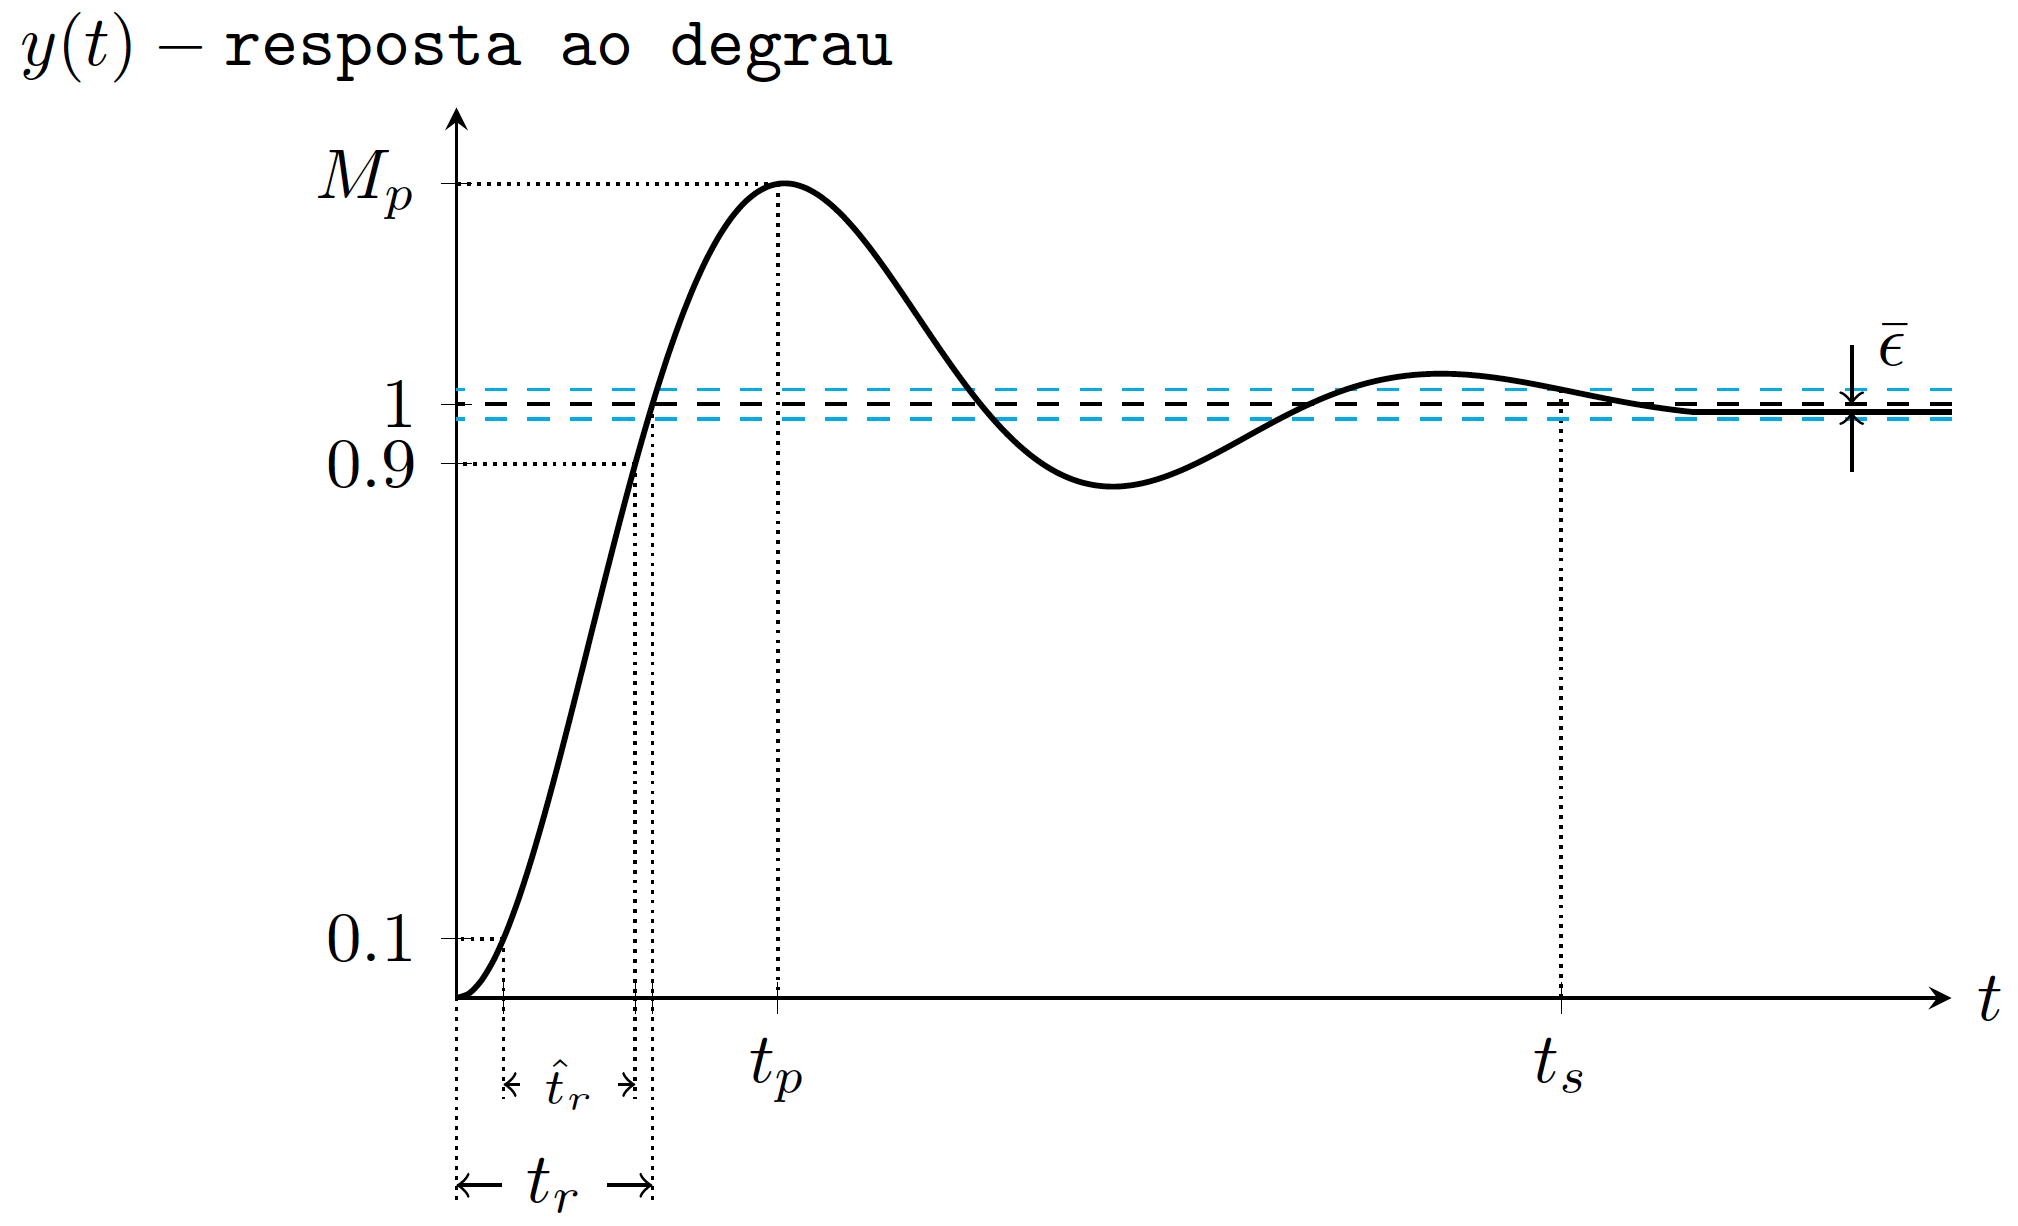

\begin{align*}
\textbf{Tempo de subida}: t_r = \dfrac{\pi - \beta}{\omega_d}\\
\textbf{Instante de pico}: t_p = \dfrac{\pi}{\omega_d}\\
\textbf{Tempo de acomodação} (t_s): t_s\textrm{(2%)} = \dfrac{4}{\sigma} = \dfrac{4}{\zeta \cdot \omega_n}\\
\textbf{Sobressinal máximo} (M_p): M_p[\textrm{%}] = 100 \cdot e^{-\pi\dfrac{\zeta}{\sqrt{1-\zeta^2}}}\\
\end{align*}

## **Controle Integral**

Para um controlador integral temos:



\begin{align*}
\underbrace{\frac{Y(s)}{R(s)}}_{\texttt{Ganho}} &= \quad \underbrace{\frac{\frac{K_i}{s}\frac{1.32}{(78 s+ 1.35)}}{1+\frac{K_i}{s}\frac{1.32}{(78 s+ 1.35)}}}_{\texttt{Função de transferência}}
\end{align*}

Importante observar que quando manipulamos a funÇão de transferência obtemos uma funÇão correspondete a forma canônica de segunda ordem. Nesta correspondência temos que: $$2 \zeta \omega_n = 1.35 $$ e $$\omega_n^2 = 1.32 K_i $$. Se manipularmos $K_i$ sintonizamos os valores de $\omega_n$ e consegquentemente o valor do amortecimento $\zeta$. Esta sintonia implica em cmportamentos temporais conforme a figura destcada acima.

\begin{align*}
\underbrace{\frac{Y(s)}{R(s)}}_{\texttt{Ganho}} &= \quad \underbrace{\frac{1.32 K_i}{78s^2+ 1.35s+1.32K_i}}_{\texttt{Função de transferência}}
\end{align*}

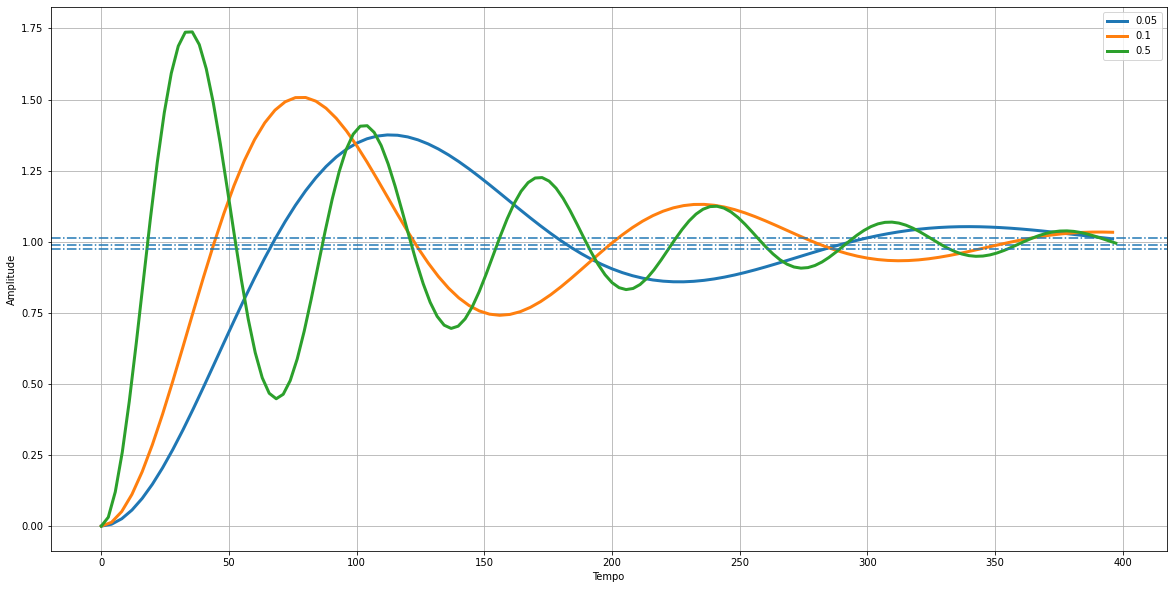

In [ ]:
plt.figure(1)

for Ki in [0.05,0.1, 0.5]:
  num = [1.32*Ki]
  den =[78,1.35,Ki*1.32]
  sys = TransferFunction(num, den)

  t, yout = step_response(sys,400)

###################################################################################################
# Visualização

  plt.plot(t,yout,linewidth=3,label=str(Ki))
  plt.axhline(y=0.98*yout[-1], linestyle='-.')

plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.show()


## **Sintonizando um controlador PI**

Trabalhando com um controlador do tipo:

\begin{equation}
G_c(s) = \frac{K_ps+K_i}{s}
\end{equation}

que essencialmente pode ser analisado como um ganho $K_p$ e um zero sintonizável em $\frac{K_i}{K_p}$:

\begin{equation}
G_c(s) = K_p\frac{s+\frac{K_i}{K_p}}{s}
\end{equation}

\begin{align*}
    G(s) = \frac{w_n^2}{s^2+2\zeta w_n s + w_n^2} = \frac{a}{s^2+2b s + c}
\end{align*}

In [ ]:
      # Modelo de referência - usuário final - tradução para Laplace
      Ts     = 200
      zetawn = 4/Ts
      zeta   = 1.0
      wn     = zetawn/zeta
      Nref   = [wn**2]
      Dref   = [1,2*zetawn,wn**2]
      Gref  = TransferFunction(Nref,Dref)
      # Resposta do modelo de referência
      tref, yref = step_response(Gref,400)

Para estimarmos os parâmetros do modelo $\mathbf{K_p}$ e $\mathbf{K_i}$, vamos utilizar  inicialmente o método de mínimos quadrados. Podemos então formular o problema a partir da Equação abaixo. Na Equação $y_{ref}(k)$ representa o valor esperado em cada amostra $k$; $y_{mf}(\theta,k)$ representa o **valor em malha fecghada** a partir da simulação do modelo para uma determinada amostra $k$ e $\theta$ representa o vetor ed parâmetros $\theta = [ K_p \; \; K_i]^T$.

$$ min_{\theta}= \sum_{k=1}^{K}(y_{ref}(k) - y_{mf}(\theta,k))^2 $$

A equação formula a pergunta: quais os valores de $K_p$ e $K_i$ que minizam o erro quadrático quando comparados com os dados reais.

In [ ]:
# Proposta de solução: ela pode stingir o modelo de referência?

def Erro(theta,yref,tref):
      # Controlador
      Kp = theta[0]
      Ki = theta[1]
      Nc = [Kp,Ki]
      Dc = [1,0]
      Gc  = TransferFunction(Nc,Dc)
      # Processo
      Np = [1.32]
      Dp = [78, 1.35]
      Gp  = TransferFunction(Np,Dp)
      # Ganho de malha aberta
      Gma = series(Gc,Gp)
      # Ganho de malha fechada - realimentação unitária
      Gmf = feedback(Gma,1)
      # Resposta do sistema em melha fechada
      tmf, ymf = step_response(Gmf,tref)
      # Determina o erro
      EQ = ymf - yref
      return EQ

def objetivo(p):
    return Erro(p,yref,tref)


In [ ]:
(c,kvg) = optimize.leastsq(objetivo,[1,1])
print(c)

[0.4242322  0.01753055]


No handles with labels found to put in legend.


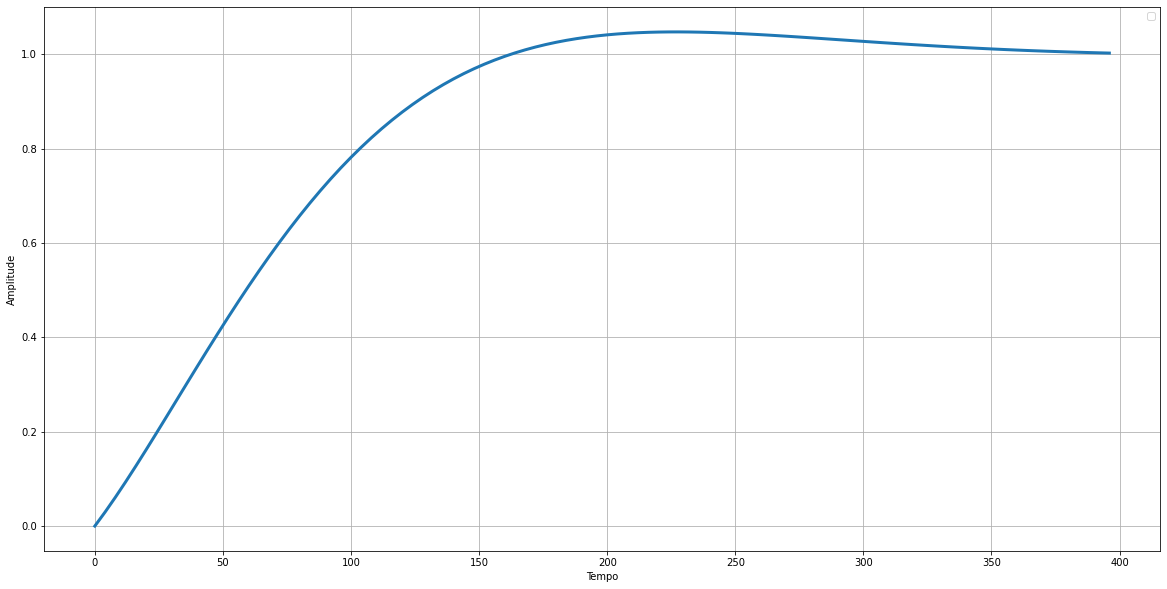

In [ ]:
plt.figure(1) ## Validação: consegui?

# Controlador
Kp = c[0]
Ki = c[1]
# Kd =   derivativo
Nc = [Kp,Ki]
Dc = [1,0]
Gc  = TransferFunction(Nc,Dc)
# Processo
Np = [1.32]
Dp = [78, 1.35]
Gp  = TransferFunction(Np,Dp)
# Ganho de malha aberta
Gma = series(Gc,Gp)
# Ganho de malha fechada - realimentação unitária
Gmf = feedback(Gma,1)
# Resposta do sistema em melha fechada
tmf, ymf = step_response(Gmf,tref)

###################################################################################################
# Visualização

plt.plot(tmf,ymf,linewidth=3)
# plt.plot(tref,yref,linewidth=1)

plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.show()

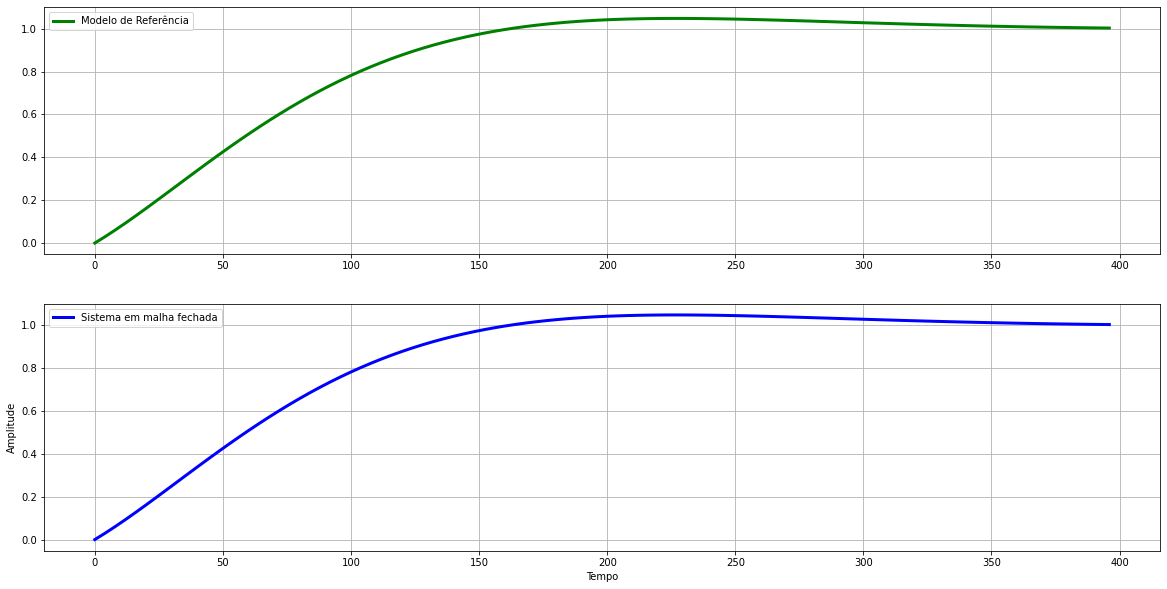

In [ ]:
###################################################################################################
# Visualização

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(tref,yref,'g-',linewidth=3,label='Modelo de Referência')
plt.grid()
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(tmf,ymf,'b-',linewidth=3,label='Sistema em malha fechada')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.grid()
plt.legend(loc='best')
plt.show()

# **Referências**

https://apmonitor.com/pdc/index.php/Main/ModelLinearization